In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import collections
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RandomizedLasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import (LogisticRegression, RandomizedLogisticRegression)
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import linear_model

In [106]:
data = pd.read_csv('/Users/Sriram/Documents/Soundz_Interview_Prep/learning/springboard/capstone_project/data/bank-full.csv',delimiter=";")
data.columns
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [107]:
training_features = ['job', 'education', 'default', 'balance', 'housing','loan']
target = 'y'

In [108]:
train_x, test_x, train_y, test_y = train_test_split(data[training_features], data[target], train_size=0.7)
    
print("train_x size :: ", train_x.shape)
print("train_y size :: ", train_y.shape)
 
print("test_x size :: ", test_x.shape)
print("test_y size :: ", test_y.shape)

train_x size ::  (31647, 6)
train_y size ::  (31647,)
test_x size ::  (13564, 6)
test_y size ::  (13564,)


In [109]:
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in selectedcols:
    catlist='var'+'_'+var
    catlist = pd.get_dummies(data[var], prefix=var)
    data1=data.join(catlist)
    data=data1
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in selectedcols]

In [110]:
data_final=data[to_keep]
data_final['y'] = data_final['y'].map({'yes': 1, 'no': 0})
data_final.columns


/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [111]:
data_final_vars=list(data_final.columns.values)
Y = ['y']
X=[i for i in data_final_vars if i not in Y]
data_final.shape

(45211, 52)

Goal - To classify if a client will subscribed to term deposit or not.

We going to take two set of data for our experiment.
1. 70-30 train and test split - attributes are selected using feature selection RFE
2. 80-20 split with attributes selected from ridgecv.


In [112]:
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[Y])
print(rfe.support_)
print(rfe.ranking_)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False  True False  True False False  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True]
[32 34 29 31 16 33 28 26 19 11  6 25  2 22 21  1 24  7 14 17  4 27  5  9 23
 10 12  8 20  1 30  1  3 13  1 18  1  1  1  1  1 15  1  1  1  1  1  1  1  1
  1]


Using LassoCV and RidgeCV to estimate cooeficient of the attributes. The values greather than zero indicates feature importance

In [113]:
lassocv = linear_model.LassoCV()
lassocv.fit(data_final[X], data_final[Y])
lassocv_score = lassocv.score(data_final[X], data_final[Y])
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV [  0.00000000e+00   4.63660318e-06  -0.00000000e+00   4.89827630e-04
  -0.00000000e+00   3.23741537e-04   0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00]


LassoCV is unstable in a similar way as unregularized linear models are meaning that the coefficients (and thus feature ranks) can vary significantly even on small data changes when there are correlated features in the data. 
So we will use RidgeCV which is L2 regularization.

In [114]:
alpha_range = 10.**np.arange(-3, 3)
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='mean_squared_error')
ridgeregcv.fit(data_final[X], data_final[Y])
ridgeregcv.alpha_
ridgeregcv.coef_

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Use

array([[  1.78486103e-04,   1.23567387e-06,   9.75015223e-04,
          4.71030004e-04,  -1.54446208e-03,  -6.26637114e-05,
          1.07178610e-03,   8.26886427e-03,  -9.66469687e-03,
         -1.53656136e-02,  -2.44566146e-02,  -1.57358670e-03,
          3.66123044e-02,  -1.25015871e-02,  -4.52272247e-03,
          7.91400027e-02,  -2.19043168e-03,   2.34920720e-03,
         -1.79805784e-02,   1.89857027e-03,  -9.93505405e-03,
          1.07808126e-02,  -1.16329930e-02,  -4.57588458e-03,
          1.26917122e-02,   8.79895942e-05,   5.13786599e-04,
         -5.13786599e-04,   2.44419129e-02,  -2.44419129e-02,
          1.19593793e-02,  -1.19593793e-02,   3.80648198e-02,
          2.59060503e-02,  -4.99562606e-02,   3.11688479e-02,
         -4.15722200e-02,   1.66834891e-01,   1.43292787e-02,
         -8.13095368e-02,  -4.24800029e-02,   4.52094903e-02,
          3.09020021e-01,  -1.53331336e-03,  -4.57736682e-02,
          1.87699607e-01,   1.94642533e-01,  -3.75707951e-02,
        

Using RidgeCV we have obtained 25 features which are important for our data prediction

In [115]:
data_final[X].columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

Feature Selection -18 attributes for our first set of analysis

In [116]:
cols=['job_student','housing_yes','loan_yes','contact_unknown','month_aug', 'month_dec', 'month_feb','month_jan', 'month_jul','month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success','poutcome_unknown'] 
X1=data_final[cols]
Y1=data_final['y']


In [117]:
X1.head()
Y1.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

As the values are binary not linear we will use logistic regression model for our prediction.
From our logistic regression we obtain a p value of zero(P < 0.001) which means its statistically highly significant.

In [118]:
import statsmodels.api as sm
logit_model=sm.Logit(Y1,X1)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.304282
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45193
Method:                           MLE   Df Model:                           17
Date:                Sat, 27 Jan 2018   Pseudo R-squ.:                  0.1568
Time:                        19:34:33   Log-Likelihood:                -13757.
converged:                       True   LL-Null:                       -16315.
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
job_student          0.4880      0.084      5.789      0.000       0.323       0.653
housing_yes

We can infer that the value of p from logistic regression is zero.

In [119]:
data_final.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

1. Logistic regression 
We will apply Logistic Regression to 70-30% train and test split. 
From the below prediction, we get a accuracy of 0.89 using logistic regression.
With Precision Score and Recall score of 0.70 and 0.16

In [120]:

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
lreg = logreg.fit(X_train, y_train)

In [121]:
y_pred = lreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision score for logistic regression classifier {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.89
Precision score for logistic regression classifier 0.70
Recall score for logistic regression classifier 0.16


In [122]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11829   114]
 [ 1359   262]]


Applying kfold cross validation on the test and train split. 
By varying the number of folds, we found that 3 split Kfold cross validation provides more accuracy.

In [123]:

kfold = model_selection.KFold(n_splits=3, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("k-fold cross validation average accuracy: %.2f" % (results.mean()))

k-fold cross validation average accuracy: 0.89


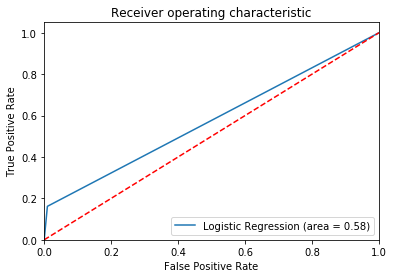

In [124]:

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [125]:
X2 = data_final[X]
Y2 = data_final[Y]


2. Decision Tree
Decision Tree model using entropy and gini on train and test data set.

In [126]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(X2, Y2,test_size =0.3)

In [127]:
model_dt1 = DecisionTreeClassifier(max_depth = 810, criterion ="entropy")
model_dt1.fit(x_train0, y_train0)
y_pred_dt0 = model_dt1.predict_proba(x_test0)[:, 1]

In [128]:
model_dt = DecisionTreeClassifier(criterion ="gini")
model_dt.fit(x_train0, y_train0)
y_pred_dt0 = model_dt.predict(x_test0)


In [129]:
model_dt1.feature_importances_

array([  7.64490266e-02,   1.07616520e-01,   9.07040667e-02,
         2.73679533e-01,   3.05683029e-02,   3.65026818e-02,
         1.09254127e-02,   8.22124620e-03,   8.50796635e-03,
         2.99486231e-03,   1.85734916e-03,   6.93155998e-03,
         2.42635036e-03,   3.08987836e-03,   4.77397342e-03,
         1.88976031e-03,   7.71877131e-03,   1.81309962e-03,
         1.84260552e-04,   5.46136607e-03,   9.62642337e-03,
         6.15510429e-03,   5.97051726e-03,   1.07968207e-02,
         6.45562387e-03,   2.43064372e-03,   4.63705208e-04,
         1.65029815e-03,   2.33619248e-02,   1.86596747e-03,
         2.04314746e-03,   4.24678455e-03,   5.15547710e-03,
         1.94185716e-03,   3.58117017e-02,   6.52141355e-03,
         1.23579485e-02,   2.96783844e-03,   9.98400556e-03,
         7.40887016e-03,   1.38023457e-02,   9.09035018e-03,
         1.23025899e-02,   8.94157008e-03,   1.15465382e-02,
         1.09778187e-02,   5.33221960e-03,   2.44083550e-03,
         1.45602247e-03,

In [130]:
x_train0.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [131]:
model_dt.feature_importances_

array([  9.14128258e-02,   1.04187209e-01,   8.06424396e-02,
         2.71189934e-01,   2.96515558e-02,   4.51746764e-02,
         1.10683858e-02,   7.47882399e-03,   4.17643661e-03,
         4.22849302e-03,   2.46041631e-03,   1.02020586e-02,
         3.50086072e-03,   3.52971622e-03,   5.82808944e-03,
         3.62482138e-03,   8.69505339e-03,   2.93814837e-03,
         1.18495627e-03,   6.94007008e-03,   9.07422849e-03,
         8.19794831e-03,   5.88717156e-03,   9.17865974e-03,
         8.78274595e-03,   3.83036799e-03,   1.76770062e-03,
         8.87254244e-04,   1.91801487e-02,   5.17897978e-03,
         2.60617917e-03,   4.70395627e-03,   6.05186605e-03,
         3.89915382e-03,   1.02741022e-02,   1.55602114e-02,
         6.20801346e-03,   4.62727004e-03,   9.47279973e-03,
         4.66476240e-03,   7.53370412e-03,   8.83392310e-03,
         1.72732275e-02,   7.80359154e-03,   6.49049137e-03,
         1.17655352e-02,   7.48307644e-03,   2.46891143e-03,
         3.19123857e-03,

In [132]:
fpr_dt, tpr_dt,_ = roc_curve(y_test0, y_pred_dt0)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [133]:
print('Precision score for Decision Tree{:.2f} '.format(precision_score(y_test0,y_pred_dt0)))
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test0, y_pred_dt0)))
print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test0, y_pred_dt0))

Precision score for Decision Tree0.48 
Recall score for Decision Tree 0.48 
Confusion Matrix for Decision Tree 
 [[11066   868]
 [  840   790]]


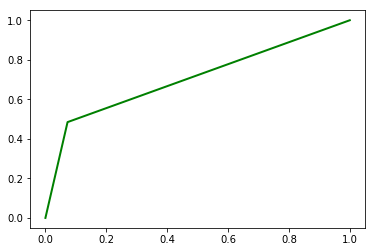

In [134]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)

3. SVM - Applying SVM model on train and test split with 70-30% 

In [135]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X2, Y2,test_size =0.3)

In [136]:
model_bayes = svm.SVC()

pred_bayes = model_bayes.fit(x_train1, y_train1)
y_pred_bayes = pred_bayes.predict(x_test1)
fprbayes, tprbayes, _= roc_curve(y_test1, y_pred_bayes)
roc_auc_bayes = auc(fprbayes, tprbayes)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
print('Precision score for SVM{:.2f} '.format(precision_score(y_test1,y_pred_bayes )))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test1,y_pred_bayes)))
print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test1, y_pred_bayes))

Precision score for SVM0.00 
Recall score for SVM 0.00
Confusion Matrix for SVM 
 [[11981     0]
 [ 1583     0]]


/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


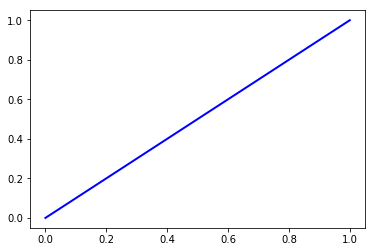

In [138]:
plt.plot(fprbayes, tprbayes, color='blue',lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes)

4. Random Forest- Random Forest on 70-30% train and test set

In [139]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2,test_size =0.3)

In [140]:
y_test2.count()


y    13564
dtype: int64

In [141]:
y_test2.loc[y_test2['y'] == 1].count()/y_test2.count()

y    0.117886
dtype: float64

In [142]:
model_rf = RandomForestClassifier(max_depth=25, n_estimators = 100)
model_pred = model_rf.fit(x_train2, y_train2)
y_pred_rf = model_rf.predict(x_test2)

fpr_rf, tpr_rf, _ = roc_curve(y_test2, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [143]:
print('Precision score for Random forest{:.2f} '.format(precision_score(y_test2,y_pred_rf)))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test2,y_pred_rf)))
print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test2, y_pred_rf))

Precision score for Random forest0.67 
Recall score for Random forest 0.39
Confusion Matrix for Random forest 
  [[11657   308]
 [  968   631]]


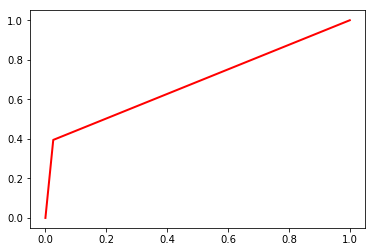

In [144]:
plt.plot(fpr_rf, tpr_rf, color='red',lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)

Below chart displays the ROC with False and True rates for each of the above models 

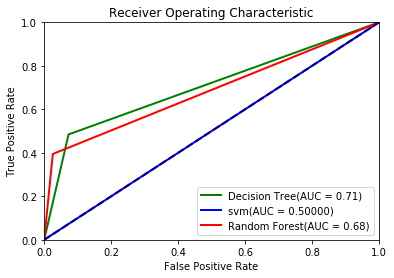

In [145]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot(fprbayes, tprbayes, color='blue',
         lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

* Logistic - Accuracy of logistic regression classifier on test set: 0.89
* Recall score for logistic regression classifier 0.16
* Decision - Recall score for Decision Tree 0.48
* SVM - Recall score for SVM 0
* Random Forest - Recall score for Random forest 0.39

From the recall score, we observe that decision tree has the highest score compared to other classification techniques.


For predicting if a client will subscribe to term deposit or not, we need to consider tp and fn to calculate the campaign success thus we will be evaluating our models using recall score.(The recall is intuitively the ability of the classifier to find all the positive samples) 

Below lists the recall score and confusion matrix for all the 4 models which we used to do our predictive analysis on.

In [146]:
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test, y_pred)))
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test0, y_pred_dt0)))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test1,y_pred_bayes)))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test2,y_pred_rf)))

Recall score for logistic regression classifier 0.16
Recall score for Decision Tree 0.48 
Recall score for SVM 0.00
Recall score for Random forest 0.39


In [147]:
print("Confusion matrix with 70-30 \n TN FP\n")
print (" FN TP ")       
print('Confusion Matrix for Logistic regression \n', metrics.confusion_matrix(y_test, y_pred))

print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test0, y_pred_dt0))

print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test1, y_pred_bayes))

print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test2,y_pred_rf))


Confusion matrix with 70-30 
 TN FP

 FN TP 
Confusion Matrix for Logistic regression 
 [[11829   114]
 [ 1359   262]]
Confusion Matrix for Decision Tree 
 [[11066   868]
 [  840   790]]
Confusion Matrix for SVM 
 [[11981     0]
 [ 1583     0]]
Confusion Matrix for Random forest 
  [[11657   308]
 [  968   631]]


From the above confusion matrix, Decision tree has highest recall score - as we are trying to find  all the positive samples, decision tree is best model for our predictive analysis.

SVM has low number of FP and TP, and categorizing all the values as negatives so we cant use SVM for our prediction. 

Logistic Regression and Random forest seems to have similar recall score and lower number of positives.

Looking at the confusion matrix we can conclude that Decision Tree model is better suited for our prediction.


Applying the same models with 80-20% train and test set using features selected via ridgecv.

In [148]:
cols1 =['age','balance','day','duration','previous','job_admin.','job_retired','job_student','job_unemployed','marital_divorced','marital_single','education_tertiary','education_unknown','default_no','housing_no','loan_no','contact_cellular','contact_telephone','month_apr','month_dec','month_feb','month_jun','month_mar','month_oct','month_sep','poutcome_success']
X3=data_final[cols1]
Y3=data_final['y']

Logistic Regression

In [149]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
lreg = logreg.fit(X_train3, y_train3)

In [150]:
y_pred3 = logreg.predict(X_test3)
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test3, y_pred3)))
print(metrics.confusion_matrix(y_test3, y_pred3))

Recall score for logistic regression classifier 0.33
[[7738  210]
 [ 735  360]]


Decision Tree

In [151]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X3, Y3,test_size =0.2)

In [152]:
model_dt = DecisionTreeClassifier(criterion ="gini")
model_dt.fit(x_train4, y_train4)
y_pred_dt4 = model_dt.predict(x_test4)

In [153]:
fpr_dt, tpr_dt,_ = roc_curve(y_test4, y_pred_dt4)
roc_auc_dt1 = auc(fpr_dt, tpr_dt)

In [154]:
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test4, y_pred_dt4)))
print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test4, y_pred_dt4))

Recall score for Decision Tree 0.48 
Confusion Matrix for Decision Tree 
 [[7414  571]
 [ 545  513]]


SVM

In [155]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(X3, Y3,test_size =0.2)

In [156]:
model_bayes = svm.SVC()

pred_bayes = model_bayes.fit(x_train5, y_train5)
y_pred_bayes5 = pred_bayes.predict(x_test5)
fprbayes, tprbayes, _= roc_curve(y_test5, y_pred_bayes5)
roc_auc_bayes2 = auc(fprbayes, tprbayes)

In [157]:
print('Recall score for SVM {:.2f}'.format(recall_score(y_test5,y_pred_bayes5)))
print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test5, y_pred_bayes5))

Recall score for SVM 0.00
Confusion Matrix for SVM 
 [[7968    0]
 [1075    0]]


Random forest

In [158]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(X3, Y3,test_size =0.2)

In [159]:
model_rf = RandomForestClassifier(max_depth=21)
model_pred = model_rf.fit(x_train6, y_train6)
y_pred_rf6 = model_rf.predict(x_test6)

fpr_rf, tpr_rf, _ = roc_curve(y_test6, y_pred_rf6)
roc_auc_rf3 = auc(fpr_rf, tpr_rf)


In [160]:
print('Recall score for Random forest {:.2f}'.format(metrics.recall_score(y_test6,y_pred_rf6)))
print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test6, y_pred_rf6))

Recall score for Random forest 0.39
Confusion Matrix for Random forest 
  [[7680  257]
 [ 678  428]]


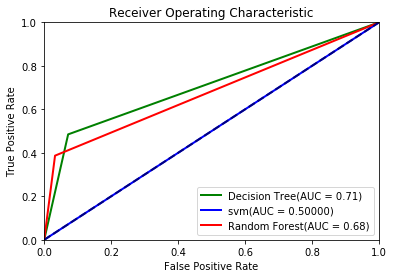

In [161]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt1)
plt.plot(fprbayes, tprbayes, color='blue',
         lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes2)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [162]:
print('Recall score for logistic regression classifier {:.2f}'.format(metrics.recall_score(y_test3, y_pred3)))
print('Recall score for Decision Tree {:.2f} '.format(metrics.recall_score(y_test4, y_pred_dt4)))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test5,y_pred_bayes5)))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test6,y_pred_rf6)))

Recall score for logistic regression classifier 0.33
Recall score for Decision Tree 0.48 
Recall score for SVM 0.00
Recall score for Random forest 0.39


In [163]:
print("Confusion matrix with 80-20 \n TN FP\n")
print (" FN TP ")       
print('Confusion Matrix for Logistic regression \n', metrics.confusion_matrix(y_test3, y_pred3))

print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test4, y_pred_dt4))

print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test5, y_pred_bayes5))

print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test6,y_pred_rf6))

Confusion matrix with 80-20 
 TN FP

 FN TP 
Confusion Matrix for Logistic regression 
 [[7738  210]
 [ 735  360]]
Confusion Matrix for Decision Tree 
 [[7414  571]
 [ 545  513]]
Confusion Matrix for SVM 
 [[7968    0]
 [1075    0]]
Confusion Matrix for Random forest 
  [[7680  257]
 [ 678  428]]


Similar to our 70-30 split our 80-20% train and test split follows the same hypothesis.

Even though our recall score for logistic and random forest is better then 70-30 split its still lower compare to decision tree.

From the two experiments by varying the number of features selected and test and train split ratio, we can observe that logistic and random forest is behaving slightly better in 80-20 split with features from ridgecv.

We tried changing the value of max depth in random forest but still decision tree provided us with the best recall score in all the scenarios.

We will use decision tree which has highest recall score and higher number of positives from confusion matrix for our prediction model.

